In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

#Picking random samples from different data sets. 
#Limited to 4500 samples due to processing
df = pd.read_csv('flights.csv')



print(df.columns)
df

Index(['flight', 'time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload', 'altitude', 'date',
       'time_day', 'route'],
      dtype='object')


,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.10,1.1,198.0,22.857437,0.095421,-79.782802,40.459018,271.560190,0.021382,...,0.009449,0.444553,-0.274965,-9.796700,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257892,279,152.20,1.1,196.0,22.847422,0.095421,-79.782802,40.459018,271.571983,0.021383,...,-0.001755,0.451230,-0.240619,-9.793810,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257893,279,152.41,1.2,189.0,22.856186,0.111325,-79.782802,40.459018,271.584533,0.021385,...,0.008545,0.443839,-0.274903,-9.796004,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257894,279,152.60,1.1,187.0,22.854933,0.127228,-79.782802,40.459018,271.588050,0.021393,...,-0.001379,0.443880,-0.248434,-9.794703,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7


In [102]:
df['power'] = df['battery_voltage'] * df['battery_current']
df = df.loc[(df['flight'] == 279)]
df
#new_df = df.loc[df['payload'] == 750]
#print(new_df['linear_acceleration_x'].max())
#print(new_df['linear_acceleration_y'].max())
#print(new_df['linear_acceleration_z'].max())


,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,power
256908,279,0.00,1.3,178.0,23.561090,0.055662,-79.782771,40.459020,273.378145,-0.016817,...,0.054786,0.364294,-9.803115,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,1.311467
256909,279,0.11,1.3,178.0,23.551073,0.055662,-79.782771,40.459020,273.379896,-0.016800,...,0.058964,0.359443,-9.803188,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,1.310910
256910,279,0.20,1.3,177.0,23.551073,0.047711,-79.782771,40.459021,273.377731,-0.016812,...,0.051330,0.345389,-9.804602,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,1.123637
256911,279,0.40,1.2,175.0,23.561090,0.071566,-79.782771,40.459021,273.373376,-0.016826,...,0.052944,0.364127,-9.804322,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,1.686172
256912,279,0.51,1.3,174.0,23.553577,0.087470,-79.782771,40.459021,273.377094,-0.016834,...,0.057605,0.362780,-9.801545,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,2.060220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.10,1.1,198.0,22.857437,0.095421,-79.782802,40.459018,271.560190,0.021382,...,0.444553,-0.274965,-9.796700,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,2.181086
257892,279,152.20,1.1,196.0,22.847422,0.095421,-79.782802,40.459018,271.571983,0.021383,...,0.451230,-0.240619,-9.793810,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,2.180130
257893,279,152.41,1.2,189.0,22.856186,0.111325,-79.782802,40.459018,271.584533,0.021385,...,0.443839,-0.274903,-9.796004,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,2.544461
257894,279,152.60,1.1,187.0,22.854933,0.127228,-79.782802,40.459018,271.588050,0.021393,...,0.443880,-0.248434,-9.794703,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7,2.907796


## Graphs

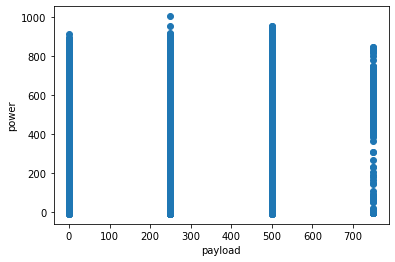

In [71]:
%matplotlib inline
plt.xlabel('payload')
plt.ylabel('power')
plt.scatter(df.payload,df.power)

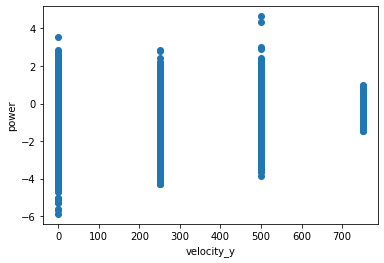

In [77]:
%matplotlib inline
plt.xlabel('velocity_y')
plt.ylabel('power')
plt.scatter(df.payload,df.linear_acceleration_x )

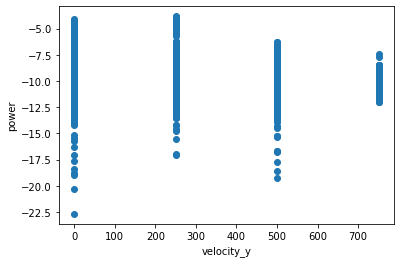

In [91]:
%matplotlib inline
plt.xlabel('velocity_y')
plt.ylabel('power')
plt.scatter(df.payload,df.linear_acceleration_z )

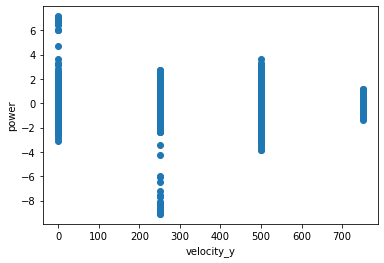

In [78]:
%matplotlib inline
plt.xlabel('velocity_y')
plt.ylabel('power')
plt.scatter(df.payload,df.linear_acceleration_y )

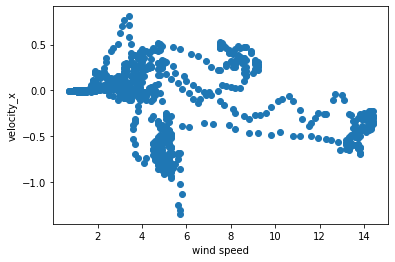

In [104]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_x')
plt.scatter(df.wind_speed,df.velocity_x)

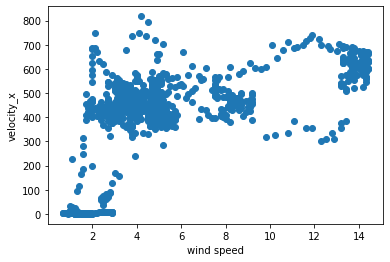

In [103]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_x')
plt.scatter(df.wind_speed,df.power)

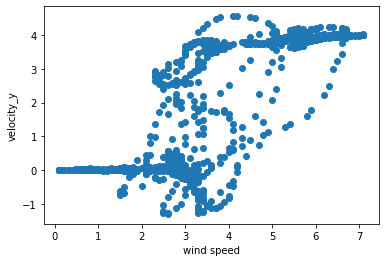

In [54]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_y')
plt.scatter(df.wind_speed,df.velocity_y)

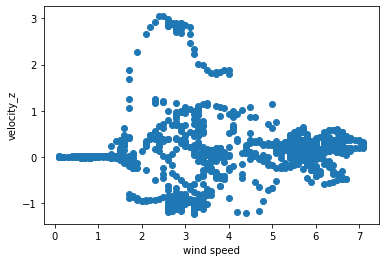

In [55]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_z')
plt.scatter(df.wind_speed,df.velocity_z)

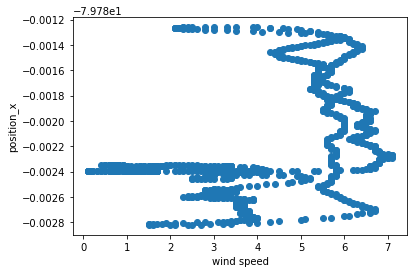

In [56]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('position_x')
plt.scatter(df.wind_speed,df.position_x)

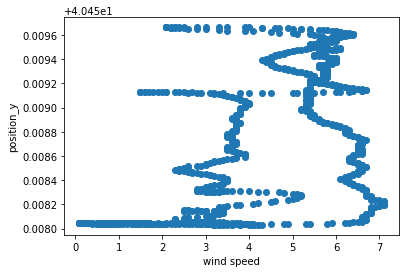

In [57]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('position_y')
plt.scatter(df.wind_speed,df.position_y)

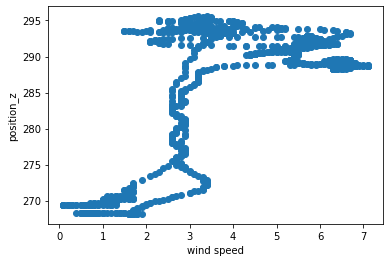

In [58]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('position_z')
plt.scatter(df.wind_speed,df.position_z)

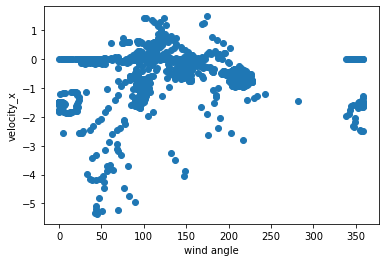

In [59]:
%matplotlib inline
plt.xlabel('wind angle')
plt.ylabel('velocity_x')
plt.scatter(df.wind_angle,df.velocity_x)

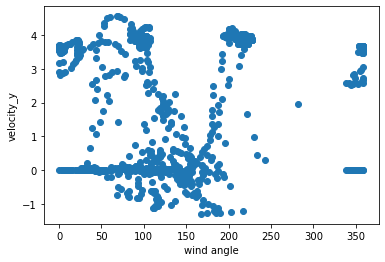

In [60]:
%matplotlib inline
plt.xlabel('wind angle')
plt.ylabel('velocity_y')
plt.scatter(df.wind_angle,df.velocity_y)

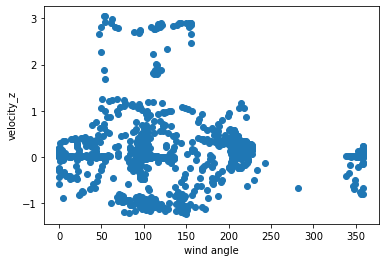

In [61]:
%matplotlib inline
plt.xlabel('wind angle')
plt.ylabel('velocity_z')
plt.scatter(df.wind_angle,df.velocity_z)

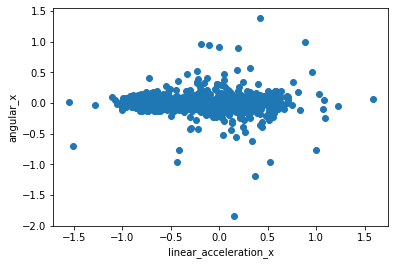

In [62]:
%matplotlib inline
plt.xlabel('linear_acceleration_x')
plt.ylabel('angular_x')
plt.scatter(df.linear_acceleration_x, df.angular_x)

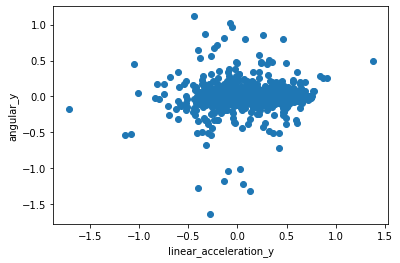

In [63]:
%matplotlib inline
plt.xlabel('linear_acceleration_y')
plt.ylabel('angular_y')
plt.scatter(df.linear_acceleration_y, df.angular_y)

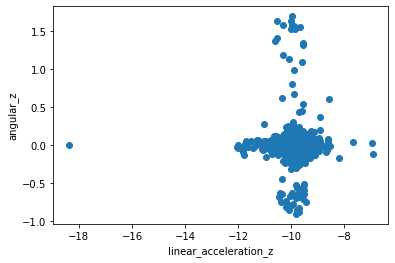

In [64]:
%matplotlib inline
plt.xlabel('linear_acceleration_z')
plt.ylabel('angular_z')
plt.scatter(df.linear_acceleration_z, df.angular_z)

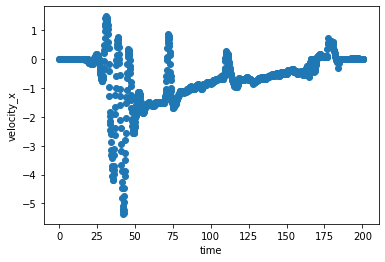

In [65]:
%matplotlib inline
plt.xlabel('time')
plt.ylabel('velocity_x')
plt.scatter(df.time, df.velocity_x)

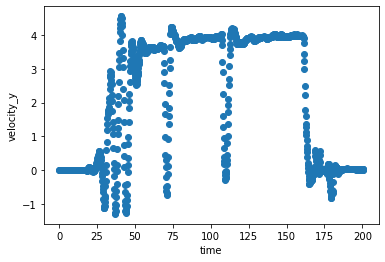

In [66]:
%matplotlib inline
plt.xlabel('time')
plt.ylabel('velocity_y')
plt.scatter(df.time, df.velocity_y)

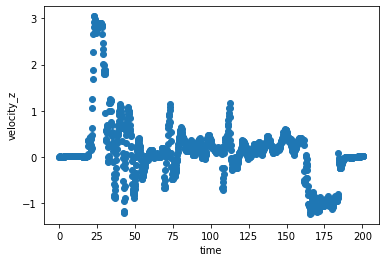

In [67]:
%matplotlib inline
plt.xlabel('time')
plt.ylabel('velocity_z')
plt.scatter(df.time, df.velocity_z)

In [ ]:
%matplotlib inline
plt.xlabel('time')
plt.ylabel('velocity_z')
plt.scatter(df.time, df.velocity_z)